In [130]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

df = pd.read_csv('data/covid19_sg.csv')[['Date', 'Daily Confirmed', 'Still Hospitalised', 'Daily Deaths']]
population = 5686000

df.index = df['Date'].apply(lambda s: datetime.strptime(s, '%Y-%m-%d'))
df.drop(columns=['Date'], inplace=True)

df.tail()

,Daily Confirmed,Still Hospitalised,Daily Deaths
Date,,,
2022-01-04,842,151,3
2022-01-05,805,155,2
2022-01-06,813,141,1
2022-01-07,777,135,2
2022-01-08,811,130,0


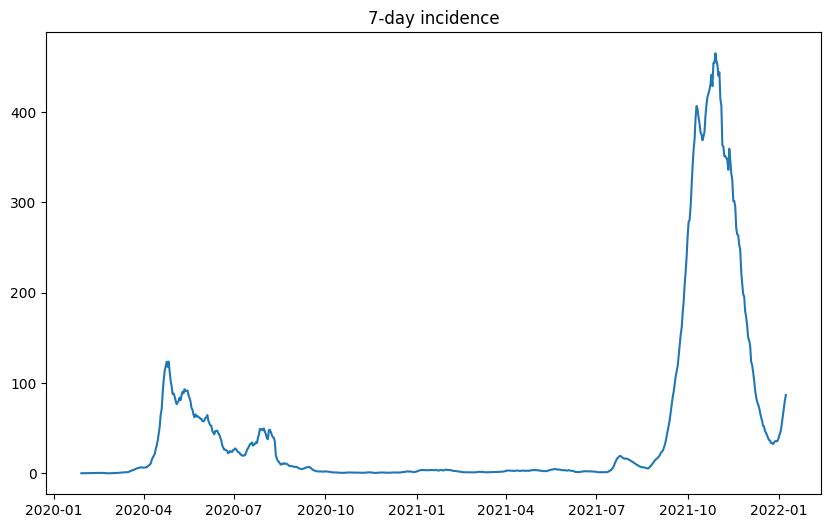

In [131]:
# calculate 7 day incidence
df['7inc'] = df['Daily Confirmed'].rolling(window=7).sum() * 100000 / population

# plot the 7-day incidence
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['7inc'])
plt.title('7-day incidence')

plt.show()

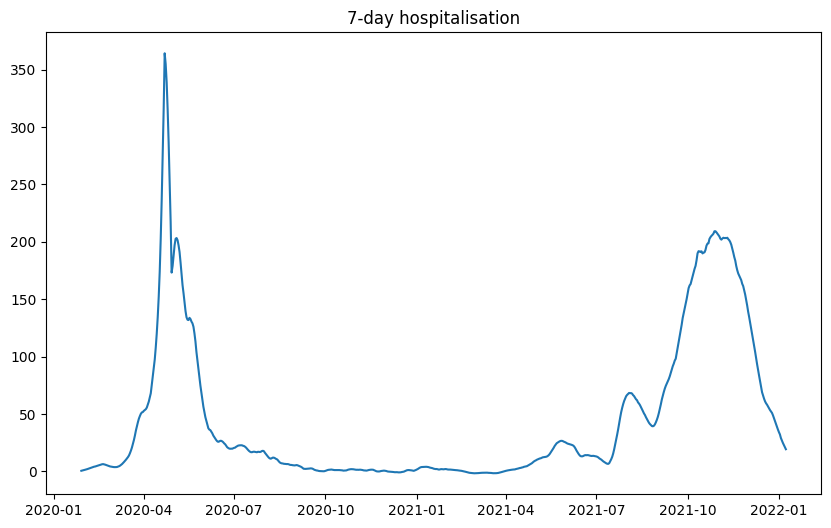

In [132]:
# calculate 7-day hospitalisation

df['7hosp'] = df['Still Hospitalised'].rolling(window=7).sum() * 100000 / population

# plot the 7-day incidence
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['7hosp'])
plt.title('7-day hospitalisation')

plt.show()


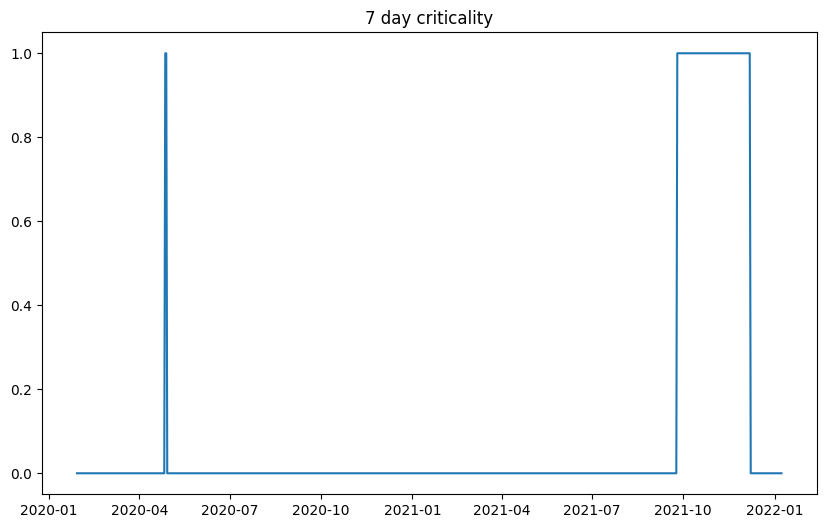

In [133]:
# calculate 7 day criticality

def crit(_7inc) -> int:
    if _7inc > 2000:
        return 4
    elif _7inc > 1000:
        return 3
    elif _7inc > 500:
        return 2
    elif _7inc > 100:
        return 1
    else:
        return 0
df['7crit'] = df['7inc'].apply(crit).rolling(window=7).min()

# plot the 7-day incidence
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['7crit'])
plt.title('7 day criticality')

plt.show()